In [13]:
import os
import random

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from performance_profile import compute_performance_profiles
from plotting_utils import PLOT_STYLE, read_data_from_logs
from score_submissions import compute_leaderboard_score
from tueplots import bundles, figsizes

In [14]:
SELF_TUING = True
IGNORE_HELD_OUTS = False
QUALIFICATION_SET = False
STUDY_MODE = "individual"
# STUDY_MODE = 0
# STUDY_MODE = "all"
# STUDY_MODE = None

log_path = "../../submissions_algorithms_v0.5/logs/algoperf_scoring_v05/"
if SELF_TUING:
  log_path = os.path.join(log_path, "self_tuning")
else:
  log_path = os.path.join(log_path, "external_tuning")

full_results = read_data_from_logs(log_path)

Reading data for submission: prize_qualification_baseline
['wmt_glu_tanh_jax', 'fastmri_jax', 'criteo1tb_jax', 'librispeech_conformer_layernorm_jax', 'fastmri_tanh_jax', 'ogbg_jax', 'ogbg_model_size_jax', 'imagenet_vit_jax', 'criteo1tb_embed_init_jax', 'librispeech_conformer_jax', 'librispeech_deepspeech_jax', 'wmt_jax', 'imagenet_resnet_large_bn_init_jax', 'imagenet_resnet_jax']
['wmt_glu_tanh_jax', 'fastmri_jax', 'criteo1tb_jax', 'librispeech_conformer_layernorm_jax', 'fastmri_tanh_jax', 'ogbg_jax', 'ogbg_model_size_jax', 'imagenet_vit_jax', 'criteo1tb_embed_init_jax', 'librispeech_conformer_jax', 'librispeech_deepspeech_jax', 'wmt_jax', 'imagenet_resnet_large_bn_init_jax', 'imagenet_resnet_jax']
['wmt_glu_tanh_jax', 'fastmri_jax', 'criteo1tb_jax', 'librispeech_conformer_layernorm_jax', 'fastmri_tanh_jax', 'ogbg_jax', 'ogbg_model_size_jax', 'imagenet_vit_jax', 'criteo1tb_embed_init_jax', 'librispeech_conformer_jax', 'librispeech_deepspeech_jax', 'wmt_jax', 'imagenet_resnet_large_bn_i

In [15]:
# Remove submission that we did not compute, but reused from the other ruleset:
try:
  del full_results["prize_qualification_baseline_self"]
  del full_results["prize_qualification_baseline_ext"]
  del full_results["schedule_free_adamw_self"]
  del full_results["schedule_free_adamw_ext"]
  full_results["schedule_free_adamw"] = full_results.pop(
      "schedule_free_adamw_ext")
except KeyError:
  pass

In [16]:
if STUDY_MODE == "individual":
  # Create a DataFrame to store the scores for each study
  scores_df = pd.DataFrame()
  profile_dict = dict()

  for study in range(5):
    performance_profile_df = compute_performance_profiles(
        full_results,
        time_col='score',
        min_tau=1.0,
        max_tau=4.0,
        reference_submission_tag=None,
        num_points=100,
        scale='linear',
        verbosity=0,
        self_tuning_ruleset=SELF_TUING,
        strict=False,
        ignore_heldouts=IGNORE_HELD_OUTS,
        use_qualification_set=QUALIFICATION_SET,
        study_mode=study,
    )

    scores = compute_leaderboard_score(performance_profile_df)
    scores_df[study] = scores
    profile_dict[study] = performance_profile_df
else:
  performance_profile_df = compute_performance_profiles(
      full_results,
      time_col='score',
      min_tau=1.0,
      max_tau=4.0,
      reference_submission_tag=None,
      num_points=100,
      scale='linear',
      verbosity=0,
      self_tuning_ruleset=SELF_TUING,
      strict=False,
      ignore_heldouts=IGNORE_HELD_OUTS,
      use_qualification_set=QUALIFICATION_SET,
      study_mode=STUDY_MODE,
  )

  scores = compute_leaderboard_score(performance_profile_df)

In [17]:
performance_profile_df

,1.000000,1.030303,1.060606,1.090909,1.121212,1.151515,1.181818,1.212121,1.242424,1.272727,...,3.727273,3.757576,3.787879,3.818182,3.848485,3.878788,3.909091,3.939394,3.969697,4.000000
submission,,,,,,,,,,,,,,,,,,,,,
prize_qualification_baseline,0.375,0.5,0.5,0.5,0.5,0.5,0.5,0.625,0.625,0.625,...,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875
schedule_free_adamw,0.500,0.5,0.5,0.5,0.5,0.5,0.5,0.500,0.500,0.625,...,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750
AdamG,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
sinv6_75,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
sinv6,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375
nadamw_sequential,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375


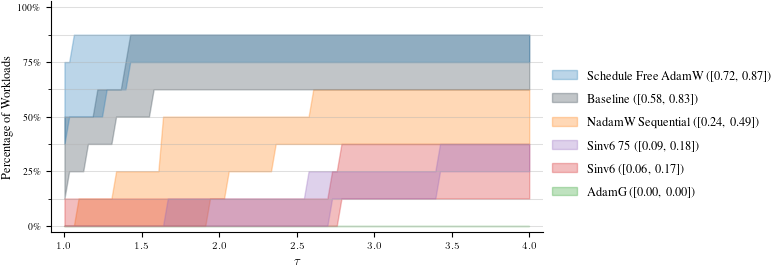

In [18]:
with plt.rc_context(
    {**bundles.iclr2024(), **figsizes.iclr2024(height_to_width_ratio=1)}):
  if STUDY_MODE == "individual":

    # Parameters
    random.seed(0)
    x_lims = [1.0, 4.0]
    y_lims = [0, 1]
    ax_lims_push_perc = 0.03
    n_xticks = 7
    n_yticks_major = 4 if QUALIFICATION_SET else 5
    n_yticks_minor = 4 if QUALIFICATION_SET else 9

    fig, ax = plt.subplots()

    df_list = list(profile_dict.values())

    combined_df = pd.concat(df_list, keys=profile_dict.keys())

    min_df = combined_df.groupby(level=1).min()
    max_df = combined_df.groupby(level=1).max()

    for submission in min_df.index:
      x = min_df.loc[submission].index.to_numpy()
      min_y = min_df.loc[submission].to_numpy()
      max_y = max_df.loc[submission].to_numpy()

      min_score = scores_df.T.min()[submission]
      max_score = scores_df.T.max()[submission]

      score = f"[{min_score:.2f}, {max_score:.2f}]"

      ax.fill_between(
          x,
          min_y,
          max_y,
          color=PLOT_STYLE[submission]["color"],
          alpha=0.3,
          label=PLOT_STYLE[submission]["label"] + f" ({score})",
      )

    # Style
    ax_lims_push = [
        ax_lims_push_perc * (x_lims[1] - x_lims[0]),
        ax_lims_push_perc * (y_lims[1] - y_lims[0]),
    ]
    ax.set_xticks(np.linspace(x_lims[0], x_lims[1], n_xticks))
    ax.set_yticks(np.linspace(y_lims[0], y_lims[1], n_yticks_major))
    ax.set_yticks(np.linspace(y_lims[0], y_lims[1], n_yticks_minor), minor=True)
    ax.set_xlim(
        left=x_lims[0] - ax_lims_push[0], right=x_lims[1] + ax_lims_push[0])
    ax.set_ylim(
        bottom=y_lims[0] - ax_lims_push[1], top=y_lims[1] + ax_lims_push[1])
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel("Percentage of Workloads")
    ax.yaxis.set_major_formatter(
        mtick.PercentFormatter(xmax=1.0, symbol='\%', is_latex=True))
    ax.grid(axis="y", which="both", linewidth=0.75)
    ax.grid(axis="x", which="both", linewidth=0.0)
    sns.despine(ax=ax)

    # Get handles and labels
    handles, labels = ax.get_legend_handles_labels()
    # Sort by label
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0][-5:], reverse=True))

    # Create the legend
    fig.legend(
        handles,
        labels,
        frameon=False,
        loc='center right',
        bbox_to_anchor=(1.43, 0.5),
        labelspacing=0.95,
        fontsize=9,
    )
  else:
    # Parameters
    random.seed(0)
    x_lims = [1.0, 4.0]
    y_lims = [0, 1]
    ax_lims_push_perc = 0.03
    n_xticks = 7
    n_yticks_major = 4 if QUALIFICATION_SET else 5
    n_yticks_minor = 4 if QUALIFICATION_SET else 9

    fig, ax = plt.subplots()

    for row in performance_profile_df.iterrows():
      submission = row[0]
      performance_profile_series = row[1:][0]
      x = performance_profile_series.index.to_numpy()
      y = performance_profile_series.to_numpy()

      n_markers = 7 + random.randint(-2, 2)
      markevery = int(len(x) / n_markers)

      ax.plot(
          x,
          y,
          color=PLOT_STYLE[submission]["color"],
          label=PLOT_STYLE[submission]["label"] +
          f" ({scores.loc[submission, 'score']:.4f})",
          linestyle=PLOT_STYLE[submission]["linestyle"],
          linewidth=2.5,
          alpha=0.75,
          marker=PLOT_STYLE[submission]["marker"],
          markersize=5.5,
          markevery=markevery,
      )

    # Style
    ax_lims_push = [
        ax_lims_push_perc * (x_lims[1] - x_lims[0]),
        ax_lims_push_perc * (y_lims[1] - y_lims[0]),
    ]
    ax.set_xticks(np.linspace(x_lims[0], x_lims[1], n_xticks))
    ax.set_yticks(np.linspace(y_lims[0], y_lims[1], n_yticks_major))
    ax.set_yticks(np.linspace(y_lims[0], y_lims[1], n_yticks_minor), minor=True)
    ax.set_xlim(
        left=x_lims[0] - ax_lims_push[0], right=x_lims[1] + ax_lims_push[0])
    ax.set_ylim(
        bottom=y_lims[0] - ax_lims_push[1], top=y_lims[1] + ax_lims_push[1])
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel("Percentage of Workloads")
    ax.yaxis.set_major_formatter(
        mtick.PercentFormatter(xmax=1.0, symbol='\%', is_latex=True))
    ax.grid(axis="y", which="both", linewidth=0.75)
    ax.grid(axis="x", which="both", linewidth=0.0)
    sns.despine(ax=ax)

    # Get handles and labels
    handles, labels = ax.get_legend_handles_labels()
    # Sort by label
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0][-5:], reverse=True))

    # Create the legend
    fig.legend(
        handles,
        labels,
        frameon=False,
        loc='center right',
        bbox_to_anchor=(1.4, 0.5),
        labelspacing=0.95,
        fontsize=9,
    )
  filename = "plots/performance_profile"
  filename += "_self_tuning" if SELF_TUING else "_external_tuning"
  filename += "_ignore_heldouts" if IGNORE_HELD_OUTS else ""
  filename += "_qualification_set" if QUALIFICATION_SET else ""
  filename += f"_study_{STUDY_MODE}" if isinstance(STUDY_MODE, int) else ""
  filename += f"_{STUDY_MODE}" if isinstance(STUDY_MODE, str) else ""

  # Savefig including the legend to the right
  plt.savefig(f"{filename}.pdf", bbox_inches='tight')
  plt.show()